In [1]:
%load_ext autoreload
%autoreload 2
# Set-up: Import numpy and assign GPU


import os
os.environ['TRANSFORMERS_CACHE'] = '/local/helenl/.cache/'
os.environ['PYTORCH_TRANSFORMERS_CACHE'] = '/local/helenl/.cache/'


import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from tqdm.notebook import tqdm

from gpu_utils import restrict_GPU_pytorch
from helenl_utils import * 

restrict_GPU_pytorch('3')

Using GPU:3


In [2]:
# Load Amazon WILDS pre-trained model

import statistics
import sys
import pickle
import numpy as np
import pandas as pd
import statistics


import torch
import torchvision.transforms as transforms

import argparse
import pdb

from wilds import get_dataset
from wordcloud import WordCloud

#import import_ipynb
#import wilds_base

#from ipynb.fs.full.wilds_base import predict_augmented_labels

sys.path.insert(0, './wilds/examples/')
os.environ["MODEL_DIR"] = '/local/helenl/helenl/models/'
model_dir = '/local/helenl/helenl/models'

from algorithms.initializer import initialize_algorithm


In [3]:
import random

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        
set_seed(0)

In [4]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
        
#config_dict = pickle.load(open('amazon_config.txt', 'rb'))



full_dataset = get_dataset(dataset='civilcomments', download=False, root_dir = './wilds/data')

In [8]:
predict_augmented_labels('bert')

NameError: name 'predict_augmented_labels' is not defined

In [ ]:
eval_inputs = get_eval_dataset()


#eval_inputs = [full_dataset[i] for i in eval_indices]

eval_inputs

In [59]:
completed_augment_labels = ['bert'
                           'nlp_ocr'
                           , 'nlp_keyboard'
                           , 'nlp_random_char_insert'
                           , 'nlp_random_char_substitution'
                           , 'nlp_random_char_swap'
                           , 'nlp_random_char_deletion'
                           , 'nlp_spelling_substitution'
                           , 'nlp_random_word_swap'
                           , 'nlp_random_word_delete']

in_progress = ['nlp_random_crop'
               , 'nlp_random_token_split'
               , 'nlp_back_translation_aug'
              ]


augmentations_requiring_model_download = ['nlp_random_similar_word_insertion_word2vec_embedding'
                           , 'nlp_random_similar_word_insertion_glove_embedding'
                           , 'nlp_random_similar_word_insertion_fasttext_embedding'
                           , 'nlp_random_similar_word_substitution_word2vec_embedding'
                           , 'nlp_random_similar_word_substitution_glove_embedding'
                           , 'nlp_random_similar_word_substitution_fasttext_embedding'
                           , 'nlp_random_similar_word_substitution_tfidf_embedding'   
]

'''
supported_augment_labels = [
                           'nlp_random_contextual_word_insertion_bert_uncased_embedding'
                           , 'nlp_random_contextual_word_insertion_bert_cased_embedding'
                           , 'nlp_random_contextual_word_insertion_distilbert_uncased_embedding'
                           , 'nlp_random_contextual_word_insertion_distilbert_cased_embedding'
                           , 'nlp_random_contextual_word_insertion_roberta_base_embedding'
                           , 'nlp_random_contextual_word_insertion_distilroberta_base_embedding'
                           , 'nlp_random_contextual_word_insertion_xlnet_embedding'
                           , 'nlp_random_contextual_word_insertion_bart_base_embedding'
                           , 'nlp_random_contextual_word_insertion_squeezebert_uncased_embedding'
                           , 'nlp_random_contextual_word_substitution_bert_uncased_embedding'
                           , 'nlp_random_contextual_word_substitution_bert_cased_embedding'
                           , 'nlp_random_contextual_word_substitution_distilbert_uncased_embedding'
                           , 'nlp_random_contextual_word_substitution_distilbert_cased_embedding'
                           , 'nlp_random_contextual_word_substitution_roberta_embedding'
                           , 'nlp_random_contextual_word_substitution_distilroberta_base_embedding'
                           , 'nlp_random_contextual_word_substitution_xlnet_embedding'
                           , 'nlp_random_contextual_word_substitution_bart_base_embedding'
                           , 'nlp_random_contextual_word_substitution_squeezebert_uncased_embedding'
                           , 'nlp_contextual_sentence_insertion_gpt2_embedding'
                           , 'nlp_contextual_sentence_insertion_xlnet_cased_embedding'
                           , 'nlp_contextual_sentence_insertion_distilgpt2_embedding'
                           , 'nlp_abstractive_summarization_bart_large_cnn'
                           , 'nlp_abstractive_summarization_t5_small'
                           , 'nlp_abstractive_summarization_t5_base'
                           , 'nlp_abstractive_summarization_t5_large'
                           , 'nlp_wordnet_synonym'
                           , 'nlp_ppdb_synonym'
                           , 'nlp_antonym'
                           , 'nlp_random_word_swap'
                           , 'nlp_random_word_delete'
                           , 'nlp_random_word_crop'
                           , 'nlp_random_token_split'
                           , 'nlp_back_translation_aug'
                           ]
'''

supported_augment_labels = [#'nlp_wordnet_synonym'
                           #, 'nlp_ppdb_synonym'
                           #'nlp_antonym'
                           'nlp_random_word_swap'
                           , 'nlp_random_word_delete'
                           , 'nlp_random_crop'
                           , 'nlp_random_substitute'
                           , 'nlp_back_translation_aug'
    
]

In [ ]:
# PLOT: corruptions vs. corrections
# subsample 80% to create error bars -> add more rows for each run to generate error bars
        
# TFIDF 33 hours RT: check gpustat; is implementation necessary for our experiments?

# Report group-specific accuracy (identities; detecting hate-speech towards specific groups)
    # Similar corruptions vs. corrections
    # See WILDS documentation for metadata
    # Make one for each augmentation (x axis identity group, y axis performance)

    
# Modify parameter of how many modifications there are (1 word, 2 words)
    # x is intensity of augmentation, y is accuracy
    # For a specific augmentation, how does average response change (higher intensity + original)

# x-axis: number of draws, y-axis: average performance across draws
    # Up to 20 or 50 draws of words to delete/characters to augment
    # up to 50 for words, 100 for char 

# Corrections and Corruptions

In [8]:
def create_corrections_corruptions_plots(accuracy_file_paths):
    aug_to_corrections_corruptions = []
    
    for file_name in accuracy_file_paths:
        original_file_name = './ERM_predictions/bert.npy'
        
        corrections_corruptions_dict = calculate_corrections_corruptions(file_name, original_file_name)
        
        corrections = corrections_corruptions_dict["num_corrections"]
        corruptions = corrections_corruptions_dict["num_corruptions"]
        
        print(file_name)
        
        # augmentation = int(file_name.split('/')[-1].split('.')[0].split('_')[-1]) # augmentation name for word experiment plot
        
        augmentation = float(file_name.split('/')[1].split('_')[-1]) # augmentation name for char experiment plot
        aug_dict = {"augmentation":augmentation, "corrections": corrections, "corruptions": corruptions}
        aug_to_corrections_corruptions.append(aug_dict)

    
    acc_df = pd.DataFrame(aug_to_corrections_corruptions)
    #print(acc_df)
    

    acc_df_melted = acc_df.reset_index().melt(id_vars = 'augmentation')
    acc_df_melted = acc_df_melted[acc_df_melted.variable != 'index']

    print(acc_df_melted)
    

    sns.set(rc = {'figure.figsize':(30,10)})
    p = sns.barplot(x = 'augmentation', y = 'value', hue = 'variable', data = acc_df_melted, ci = False, palette = ["green", "red"])#, order = acc_df['augmentation'])

    #p = sns.boxplot(x = 'augmentation', y = 'value', hue = 'variable', data = acc_df_melted, palette = ["green", "red"])#, order = acc_df['augmentation'])
    show_values(p)


    

## Across different augmentation types

                    augmentation     variable  value
9                        nlp_ocr  corrections   1938
10                  nlp_keyboard  corrections   2440
11        nlp_random_char_insert  corrections   2576
12  nlp_random_char_substitution  corrections   2512
13          nlp_random_char_swap  corrections   2389
14      nlp_random_char_deletion  corrections   2228
15     nlp_spelling_substitution  corrections   1701
16          nlp_random_word_swap  corrections   1062
17        nlp_random_word_delete  corrections   1796
18                       nlp_ocr  corruptions   2901
19                  nlp_keyboard  corruptions   4673
20        nlp_random_char_insert  corruptions   4730
21  nlp_random_char_substitution  corruptions   4664
22          nlp_random_char_swap  corruptions   4508
23      nlp_random_char_deletion  corruptions   4280
24     nlp_spelling_substitution  corruptions   2557
25          nlp_random_word_swap  corruptions   1140
26        nlp_random_word_delete  corruptions 

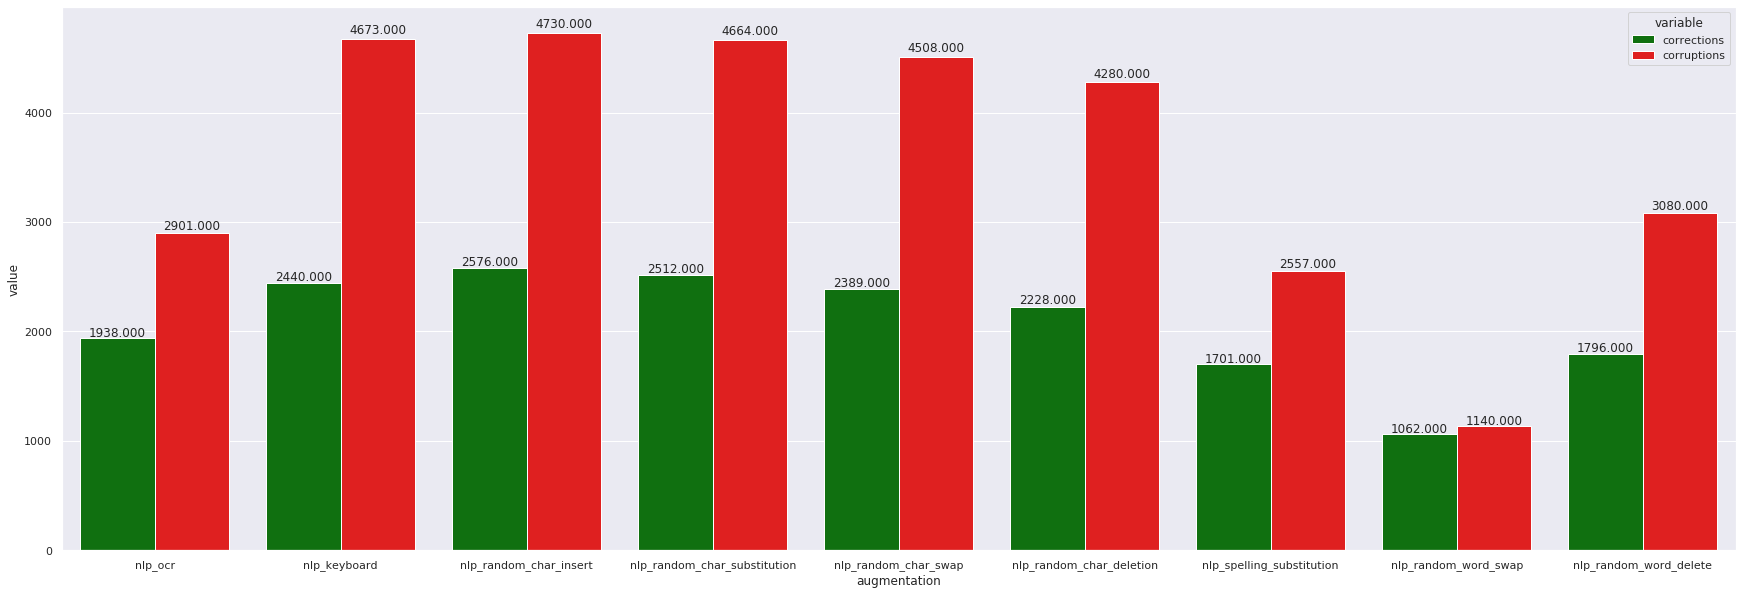

In [121]:
supported_augment_labels = ['nlp_ocr'
                           , 'nlp_keyboard'
                           , 'nlp_random_char_insert'
                           , 'nlp_random_char_substitution'
                           , 'nlp_random_char_swap'
                           , 'nlp_random_char_deletion'
                           , 'nlp_spelling_substitution'
                           , 'nlp_random_word_swap'
                           , 'nlp_random_word_delete']

file_paths = []

for augmentation in supported_augment_labels:
    file_name = './ERM_predictions/' + augmentation + ".npy"
    file_paths.append(file_Name)



create_corrections_corruptions_plots(file_paths)

## For word experiment: 

In [ ]:
word_experiments_dir = 'ERM_word_frequency_experiment'

experiment_file_paths = []

for filename in os.listdir(word_experiments_dir):
    full_path = './' + word_experiments_dir + '/' + filename

    if os.path.isfile(full_path):
        experiment_file_paths.append(full_path)
        
create_corrections_corruptions_plots(experiment_file_paths)

## For char experiment:

['ERM_char_frequency_experiment_2/word_p_0.20/word_p_0.2nlp_random_word_delete_aug_size_1.npy', 'ERM_char_frequency_experiment_2/word_p_0.05/word_p_0.05nlp_random_word_delete_aug_size_1.npy', 'ERM_char_frequency_experiment_2/word_p_0.25/word_p_0.25nlp_random_word_delete_aug_size_1.npy', 'ERM_char_frequency_experiment_2/word_p_0.10/word_p_0.1nlp_random_word_delete_aug_size_1.npy', 'ERM_char_frequency_experiment_2/word_p_0.50/word_p_0.5nlp_random_word_delete_aug_size_1.npy', 'ERM_char_frequency_experiment_2/word_p_0.75/word_p_0.75nlp_random_word_delete_aug_size_1.npy']
ERM_char_frequency_experiment_2/word_p_0.20/word_p_0.2nlp_random_word_delete_aug_size_1.npy
ERM_char_frequency_experiment_2/word_p_0.05/word_p_0.05nlp_random_word_delete_aug_size_1.npy
ERM_char_frequency_experiment_2/word_p_0.25/word_p_0.25nlp_random_word_delete_aug_size_1.npy
ERM_char_frequency_experiment_2/word_p_0.10/word_p_0.1nlp_random_word_delete_aug_size_1.npy
ERM_char_frequency_experiment_2/word_p_0.50/word_p_0.5nl

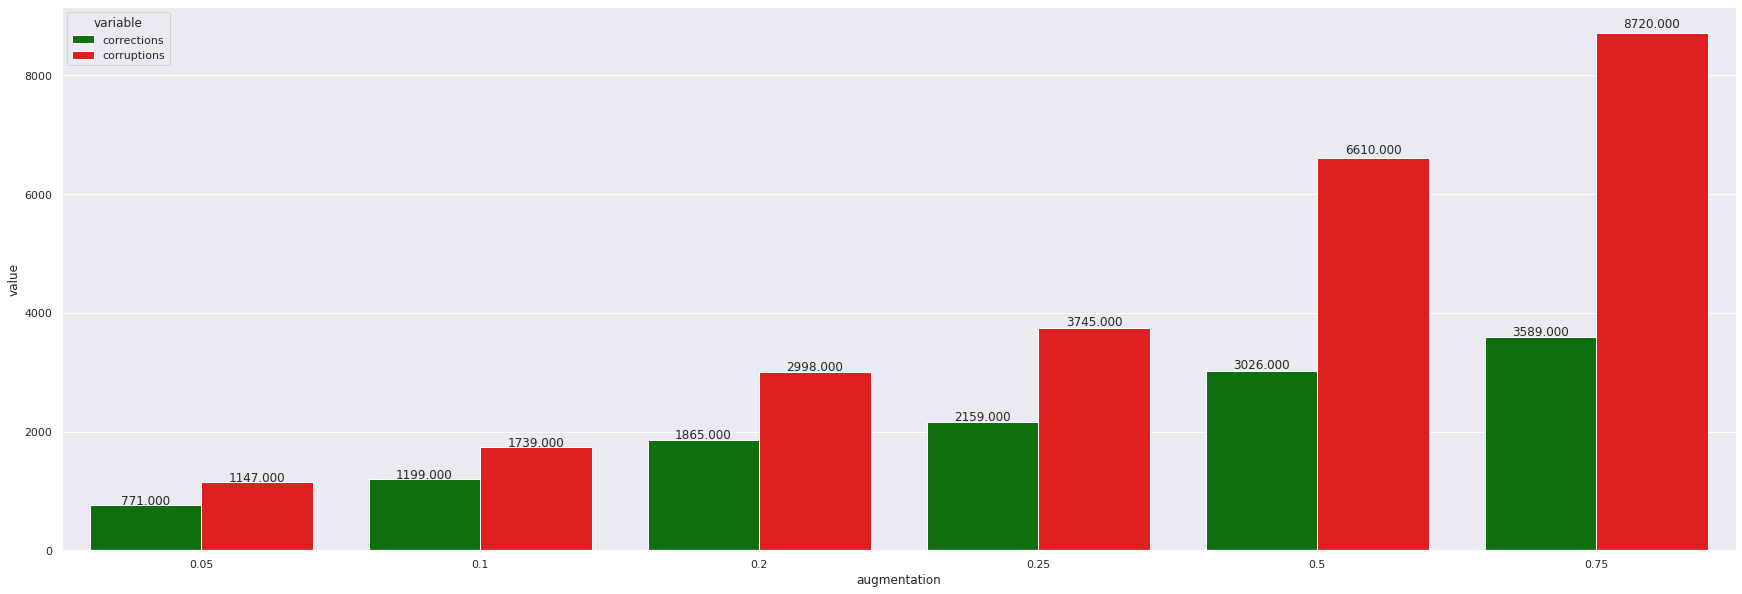

In [9]:
char_experiments_dir = 'ERM_char_frequency_experiment_2'

experiment_file_paths = []

for subdir in os.listdir(char_experiments_dir):
    subdir_path = char_experiments_dir + "/" + subdir
    
    if os.path.isdir(subdir_path):
        
        for file in os.listdir(subdir_path):
            file_path = subdir_path + "/" + file
            
            #print(file_path)
            if file_path[-5:] == '1.npy':
                experiment_file_paths.append(file_path)
        
print(experiment_file_paths)
create_corrections_corruptions_plots(experiment_file_paths)

## Code for analyzing corrections/corruptions comments

In [10]:
def create_word_cloud(comments_list, stopwords = set()):
    """
    Creates a wordcloud.
    
    Parameters:
        comments_list: List of strings to be used as inputs into the wordcloud.
        stopwords:     Set of words to be excluded from wordcloud. 
                       Default value is an empty set (so that all input words will be included in forming wordcloud.)
                       If None is passed in, WordCloud library's STOPWORDS list will be used as words to be excluded.
    
    Returns:
        None.
    """
    words = ""
    
    for comment in comments_list:
 
        # split the value
        tokens = comment.split()
     
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

## 10-word deletion correction/corruption content analysis:

In [16]:
del_10_corrections_inputs = extract_corrections_corruptions_inputs('./data/ERM_word_frequency_experiment/nlp_random_word_delete_aug_size_10.npy'
                                                                   , './data/ERM_predictions/bert.npy'
                                                                   , 'correction')

del_10_corrections_labels = del_10_corrections_inputs[1]

tox_corrected = sum(del_10_corrections_labels)
nontox_corrected = len(del_10_corrections_labels) - tox_corrected

print("toxic corrected:", tox_corrected) # toxic comments mislabeled by BERT as nontoxic but corrected with augmentation
print("nontoxic corrected:", nontox_corrected) # nontoxic comments mislabeled by BERT as toxic but corrected with augmentation

char_min: 1
word_p: 0.1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



toxic corrected: 465
nontoxic corrected: 1469


In [18]:
del_10_corruptions_inputs = extract_corrections_corruptions_inputs('./data/ERM_word_frequency_experiment/nlp_random_word_delete_aug_size_10.npy'
                                                                   , './data/ERM_predictions/bert.npy'
                                                                   , 'corruption')

del_10_corruptions_labels = del_10_corruptions_inputs[1]

tox_corrupted = sum(del_10_corruptions_labels)
nontox_corrupted = len(del_10_corruptions_labels) - tox_corrupted

print("toxic corrupted:", tox_corrupted) # toxic comments correctly labeled by BERT as toxic but corrupted with augmentation
print("nontoxic corrupted:", nontox_corrupted) # nontoxic comments correctly labeled by BERT as nontoxic but corrupted with augmentation

char_min: 1
word_p: 0.1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



toxic corrupted: 3075
nontoxic corrupted: 856


In [ ]:
create_word_cloud(del_10_corrections_inputs[0])

In [ ]:
create_word_cloud(del_10_corrections_inputs[0], None)

In [ ]:
# word cloud of inputs that were mislabeled as nontoxic by BERT but corrected by augmentation
create_word_cloud([del_10_corrections_inputs[0][i] 
                   for i in range(len(del_10_corrections_inputs[1])) 
                   if del_10_corrections_inputs[1][i] == 1])

In [ ]:
# word cloud of inputs that were mislabeled as nontoxic by BERT but corrected by augmentation
create_word_cloud([del_10_corrections_inputs[0][i] 
                   for i in range(len(del_10_corrections_inputs[1])) 
                   if del_10_corrections_inputs[1][i] == 1]
                 , None)

In [ ]:
# word cloud of inputs that were mislabeled as nontoxic by BERT but corrected by augmentation
create_word_cloud([del_10_corrections_inputs[0][i] 
                   for i in range(len(del_10_corrections_inputs[1])) 
                   if del_10_corrections_inputs[1][i] == 0])

In [ ]:
# word cloud of inputs that were mislabeled as nontoxic by BERT but corrected by augmentation
create_word_cloud([del_10_corrections_inputs[0][i] 
                   for i in range(len(del_10_corrections_inputs[1])) 
                   if del_10_corrections_inputs[1][i] == 0]
                 , None)

In [ ]:
create_word_cloud(del_10_corruptions_inputs[0])

In [ ]:
create_word_cloud(del_10_corruptions_inputs[0], None)

In [ ]:
# word cloud of inputs that were correctly labeled as toxic by BERT but corrupted by augmentation
create_word_cloud([del_10_corruptions_inputs[0][i] 
                   for i in range(len(del_10_corruptions_inputs[1])) 
                   if del_10_corruptions_inputs[1][i] == 1])

In [ ]:
# word cloud of inputs that were correctly labeled as toxic by BERT but corrupted by augmentation
create_word_cloud([del_10_corruptions_inputs[0][i] 
                   for i in range(len(del_10_corruptions_inputs[1])) 
                   if del_10_corruptions_inputs[1][i] == 1]
                 , None)

In [ ]:
# word cloud of inputs that were correctly labeled as nontoxic by BERT but corrupted by augmentation
create_word_cloud([del_10_corruptions_inputs[0][i] 
                   for i in range(len(del_10_corruptions_inputs[1])) 
                   if del_10_corruptions_inputs[1][i] == 0]
                 )

In [ ]:
# word cloud of inputs that were correctly labeled as nontoxic by BERT but corrupted by augmentation
create_word_cloud([del_10_corruptions_inputs[0][i] 
                   for i in range(len(del_10_corruptions_inputs[1])) 
                   if del_10_corruptions_inputs[1][i] == 0]
                  , None)

### TF-IDF analysis of commen words

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

corrections_corpus = syn_corrections_inputs[0]
all_corrections = ' '.join(corrections_corpus)

corruptions_corpus = syn_corruptions_inputs[0]
all_corruptions = ' '.join(corruptions_corpus)


vectorizer = TfidfVectorizer(use_idf=True)
vectorizer.fit_transform([all_corrections, all_corruptions])
feats = np.array(vectorizer.get_feature_names())

transformed_corrections = np.array(vectorizer.transform([all_corrections]).todense())[0]
transformed_corruptions = np.array(vectorizer.transform([all_corruptions]).todense())[0]

In [30]:
STOPWORDS = """
a 
about 
above
after'
again
against
all
also
am
an
and
any
are
aren't
as
at
be
because
been
before
being
below
between
both
but
by
can
can't
cannot
com
could
couldn't
did
didn't
do
does
doesn't
doing
don't
down
during
each
else
ever
few
for
from
further
get
had
hadn't
has
hasn't
have
haven't
having
he
he'd
he'll
he's
hence
her
here
here's
hers
herself
him
himself
his
how
how's
however
http
i
i'd
i'll
i'm
i've
if
in
into
is
isn't
it
it's
its
itself
just
k
let's
like
me
more
most
mustn't
my
myself
no
nor
not
of
off
on
once
only
or
other
otherwise
ought
our
ours
ourselves
out
over
own
r
same
shall
shan't
she
she'd
she'll
she's
should
shouldn't
since
so
some
such
than
that
that's
the
their
theirs
them
themselves
then
there
there's
therefore
these
they
they'd
they'll
they're
they've
this
those
through
to
too
under
until
up
very
was
wasn't
we
we'd
we'll
we're
we've
were
weren't
what
what's
when
when's
where
where's
which
while
who
who's
whom
why
why's
with
won't
would
wouldn't
www
you
you'd
you'll
you're
you've
your
yours
yourself
yourselves
"""

STOPWORDS = set(STOPWORDS.split())

In [31]:
# most frequest correction words 
corrections_without_stopwords = []

for w in feats[np.argsort(transformed_corrections)][::-1]:
    if w not in STOPWORDS:
        corrections_without_stopwords.append(w)
        
corrections = corrections_without_stopwords[:50]
corrections

['people',
 'will',
 'white',
 'trump',
 'black',
 'one',
 'racist',
 'women',
 'don',
 'men',
 'man',
 'us',
 'go',
 'even',
 'gay',
 'way',
 're',
 'now',
 'good',
 'time',
 'know',
 'president',
 'never',
 'want',
 'think',
 'muslim',
 'right',
 'many',
 'make',
 'going',
 'see',
 'woman',
 'muslims',
 'thing',
 'need',
 'hate',
 'another',
 'sex',
 'every',
 'said',
 'obama',
 'much',
 'believe',
 'kill',
 'stop',
 'liberals',
 'say',
 'take',
 'christians',
 'children']

In [32]:
# most frequent corruption words 

corruptions_without_stopwords = [] 
for w in feats[np.argsort(transformed_corruptions)][::-1]:
    if w not in STOPWORDS:
        corruptions_without_stopwords.append(w)
        
        
corruptions = corruptions_without_stopwords[:50]
corruptions

['white',
 'people',
 'trump',
 'will',
 'one',
 'black',
 'don',
 'women',
 'man',
 'us',
 'think',
 'right',
 'racist',
 're',
 'know',
 'muslim',
 'gay',
 'men',
 'now',
 'good',
 'time',
 'even',
 'make',
 'blacks',
 'muslims',
 'hate',
 'see',
 'say',
 'never',
 'fact',
 'way',
 'ridiculous',
 'nothing',
 'country',
 'anti',
 'really',
 'sex',
 'go',
 'many',
 'left',
 'mental',
 'woman',
 'let',
 'want',
 'years',
 'much',
 'another',
 'stop',
 'take',
 'thing']

In [33]:
corrections_not_corruptions = []
corruptions_not_corrections = []

for w in corrections:
    if w not in corruptions:
        corrections_not_corruptions.append(w)

for w in corruptions:
    if w not in corrections:
        corruptions_not_corrections.append(w)

In [34]:
corrections_not_corruptions

['president',
 'going',
 'need',
 'every',
 'said',
 'obama',
 'believe',
 'kill',
 'liberals',
 'christians',
 'children']

In [35]:
corruptions_not_corrections

['blacks',
 'fact',
 'ridiculous',
 'nothing',
 'country',
 'anti',
 'really',
 'left',
 'mental',
 'let',
 'years']

In [6]:
syn_corruptions_inputs = extract_corrections_corruptions_inputs('./data/ERM_predictions_optimized_params/nlp_ppdb_synonym.npy'
                                                                   , './data/ERM_predictions/bert.npy'
                                                                   , 'corruption'
                                                               , "civilcomments"
                                                               , "ERM")

syn_corruptions_labels = syn_corruptions_inputs[1]

tox_corrupted = sum(syn_corruptions_labels)
nontox_corrupted = len(syn_corruptions_labels) - tox_corrupted

print("toxic corrupted:", tox_corrupted) # toxic comments correctly labeled by BERT as toxic but corrupted with augmentation
print("nontoxic corrupted:", nontox_corrupted) # nontoxic comments correctly labeled by BERT as nontoxic but corrupted with augmentation

char_min: 1
word_p: 0.1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



toxic corrupted: 422
nontoxic corrupted: 174


In [7]:
syn_corrections_inputs = extract_corrections_corruptions_inputs('./data/ERM_predictions_optimized_params/nlp_ppdb_synonym.npy'
                                                                   , './data/ERM_predictions/bert.npy'
                                                                   , 'correction'
                                                                   , "civilcomments
                                                                   , "ERM"")

syn_corrections_labels = syn_corrections_inputs[1]

tox_corrected = sum(syn_corrections_labels)
nontox_corrected = len(syn_corrections_labels) - tox_corrupted

print("toxic corrupted:", tox_corrected) # toxic comments correctly labeled by BERT as toxic but corrupted with augmentation
print("nontoxic corrupted:", nontox_corrected) # nontoxic comments correctly labeled by BERT as nontoxic but corrupted with augmentation

SyntaxError: EOL while scanning string literal (<ipython-input-7-3d6fc2b6ff1e>, line 4)

In [5]:
def extract_word_prevalence_data(augmentation_file, baseline_file, dataset_name, algorithm_name, subsample_percent = 0.8, num_subsamples = 10):

    corruptions_inputs = extract_corrections_corruptions_inputs(augmentation_file
                                                                , baseline_file
                                                                , 'corruption'
                                                               , dataset_name = dataset_name
                                                               , algorithm_name = algorithm_name)


    corrections_inputs = extract_corrections_corruptions_inputs(augmentation_file
                                                                , baseline_file
                                                                , "correction"
                                                               , dataset_name = dataset_name
                                                               , algorithm_name = algorithm_name)


    

    corrections_comments = corrections_inputs[0]
    corrections_labels = corrections_inputs[1]

    corruptions_comments = corruptions_inputs[0]
    corruptions_labels = corruptions_inputs[1]

    toxic_word_prevalences = []
    nontoxic_word_prevalences = [] 

    

    total_corrections_dp = len(corrections_inputs[0]) 
    total_corruptions_dp = len(corruptions_inputs[0])
    
    num_corrections_subsamples = int(total_corrections_dp * 0.8) 
    num_corruptions_subsamples = int(total_corruptions_dp * 0.8)


    for i in tqdm(range(num_subsamples)):
        toxic_word_prevalence = {}
        nontoxic_word_prevalence = {}
    
        # Select random subsample of corrections and count number of toxic/nontoxic corrections/corruptions
        random_corrections_indices = np.random.choice(np.arange(total_corrections_dp)
                                                  , size = num_corrections_subsamples
                                                  , replace = False)
                                                  
        rand_corrections_comments = np.take(corrections_labels, random_corrections_indices, axis = 0)
        matching_labels = np.take(corrections_labels, random_corrections_indices)
    
        for i in range(len(rand_corrections_comments)):

            comment = corrections_comments[i]
            label = corrections_labels[i]

            words = comment.split()

            for word in words:

                if label == 1: 
                    if word in toxic_word_prevalence:
                        toxic_word_prevalence[word]["corrections"] += 1

                    else:
                        toxic_word_prevalence[word] = {"corrections": 0, "corruptions": 0}

                elif label == 0:
                    if word in nontoxic_word_prevalence:
                        nontoxic_word_prevalence[word]["corrections"] += 1

                    else:
                        nontoxic_word_prevalence[word] = {"corrections": 0, "corruptions": 0}
                        
        toxic_word_prevalences.append(toxic_word_prevalence)




        # Select random subsample of corruptions and count number of toxic/nontoxic corrections/corruptions
        random_corruptions_indices = np.random.choice(np.arange(total_corruptions_dp)
                                                  , size = num_corruptions_subsamples
                                                  , replace = False)
                                                  
        rand_corruptions_comments = np.take(corruptions_labels, random_corruptions_indices, axis = 0)
        matching_labels = np.take(corruptions_labels, random_corruptions_indices)
        
        
        for i in range(len(rand_corruptions_comments)):

            comment = corruptions_comments[i]
            label = corruptions_labels[i]

            words = comment.split()

            for word in words:

                if label == 1: 
                    if word in toxic_word_prevalence:
                        toxic_word_prevalence[word]["corruptions"] += 1

                    else:
                        toxic_word_prevalence[word] = {"corrections": 0, "corruptions": 0}

                elif label == 0:
                    if word in nontoxic_word_prevalence:
                        nontoxic_word_prevalence[word]["corruptions"] += 1

                    else:
                        nontoxic_word_prevalence[word] = {"corrections": 0, "corruptions": 0}

                    
        nontoxic_word_prevalences.append(nontoxic_word_prevalence)
    
        
    corrections_toxic_count = 0
    corruptions_toxic_count = 0

    for label in corrections_labels:
        if label == 1:
            corrections_toxic_count +=1

    for label in corruptions_labels:
        if label == 1:
            corruptions_toxic_count +=1
            

    corrections_nontoxic_count = 0
    corruptions_nontoxic_count = 0

    for label in corrections_labels:
        if label == 0:
            corrections_nontoxic_count +=1

    for label in corruptions_labels:
        if label == 0:
            corruptions_nontoxic_count +=1
        

    corrections_counts = (corrections_toxic_count, corrections_nontoxic_count)
    corruptions_counts = (corruptions_toxic_count, corruptions_nontoxic_count)


    return (toxic_word_prevalences, nontoxic_word_prevalences, corrections_counts, corruptions_counts)
        
        
        
        
   

In [6]:
a = extract_word_prevalence_data('./data/ERM_predictions_optimized_params/nlp_ppdb_synonym.npy'
                             , './data/ERM_predictions/bert.npy'
                            , "civilcomments"
                            , "ERM")

char_min: 1
word_p: 0.1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



char_min: 1
word_p: 0.1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0%|          | 0/10 [00:00<?, ?it/s]

In [13]:
a[0]

[{'Even': {'corrections': 1, 'corruptions': 1},
  'a': {'corrections': 93, 'corruptions': 257},
  'dog': {'corrections': 1, 'corruptions': 1},
  'will': {'corrections': 21, 'corruptions': 34},
  'bite': {'corrections': 1, 'corruptions': 0},
  "it's": {'corrections': 7, 'corruptions': 11},
  'abuser.': {'corrections': 0, 'corruptions': 0},
  'Sorry': {'corrections': 0, 'corruptions': 0},
  'NFL': {'corrections': 0, 'corruptions': 2},
  'you': {'corrections': 38, 'corruptions': 108},
  'kick': {'corrections': 0, 'corruptions': 1},
  'us': {'corrections': 5, 'corruptions': 12},
  'we': {'corrections': 9, 'corruptions': 21},
  'back': {'corrections': 2, 'corruptions': 8},
  '"People': {'corrections': 0, 'corruptions': 0},
  "don't": {'corrections': 10, 'corruptions': 23},
  'burn': {'corrections': 0, 'corruptions': 1},
  'other': {'corrections': 2, 'corruptions': 16},
  'people': {'corrections': 20, 'corruptions': 38},
  'alive"': {'corrections': 0, 'corruptions': 0},
  'You': {'correction

In [14]:
a[0][1]["God"]

{'corrections': 0, 'corruptions': 4}

In [19]:
a[0][6]["God"]

{'corrections': 0, 'corruptions': 4}

In [8]:
# (word, average score, number of batches)
# dictionary of word to [average_score, num_batches]

toxic_prevalence_scores = {}
nontoxic_prevalence_scores = {}


for toxic_subsample in a[0]:
    for k,v in toxic_subsample.items():

        if (v["corrections"] != 0) and (v["corruptions"] != 0): 

            toxic_prevalence_score = float(v["corrections"])/float(v["corruptions"])
            
            if k in toxic_prevalence_scores:
                toxic_prevalence_scores[k].append(toxic_prevalence_score)
                
            else:
                toxic_prevalence_scores[k] = [toxic_prevalence_score]
            
    


for nontoxic_subsample in a[1]:
    for k,v in nontoxic_subsample.items():

        if (v["corrections"] != 0) and (v["corruptions"] != 0): 

            nontoxic_prevalence_score = float(v["corrections"])/float(v["corruptions"])
            
            if k in nontoxic_prevalence_scores:
                nontoxic_prevalence_scores[k].append(nontoxic_prevalence_score)
                
            else:
                nontoxic_prevalence_scores[k] = [nontoxic_prevalence_score]
                
            
            
            
    
    



In [11]:
import operator
toxic_sorted_words = sorted(toxic_prevalence_scores.items()
                           , key=operator.itemgetter(1)
                           , reverse = True)

In [12]:
toxic_sorted_words

[('kill', [3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5]),
 ('end', [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]),
 ('Obama', [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]),
 ('islamic', [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]),
 ('GOP', [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]),
 ('bus', [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]),
 ('putting', [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]),
 ('rather', [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]),
 ('blame', [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]),
 ('win', [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]),
 ('deal', [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]),
 ('equal', [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]),
 ('guys', [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]),
 ('makes', [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]),
 ('We',
  [1.3333333333333333,
   1.3333333333333333,
   1.3333333333333333,
   1.3333333333333333,
   1.33333

In [8]:
nontoxic_sorted_words = sorted(nontoxic_prevalence_scores.items()
                                  , key=operator.itemgetter(1)
                                  , reverse = True)



array([5, 0, 3, 3, 7])

In [26]:
corrections_toxic_count = 0
corruptions_toxic_count = 0

for label in corrections_labels:
    if label == 1:
        corrections_toxic_count +=1

for label in corruptions_labels:
    if label == 1:
        corruptions_toxic_count +=1

        

In [27]:
corrections_nontoxic_count = 0
corruptions_nontoxic_count = 0

for label in corrections_labels:
    if label == 0:
        corrections_nontoxic_count +=1

for label in corruptions_labels:
    if label == 0:
        corruptions_nontoxic_count +=1

        

In [21]:
(corrections_toxic_count, corruptions_toxic_count)

(128, 422)

In [22]:
(corrections_nontoxic_count, corruptions_nontoxic_count)

(429, 174)

In [25]:
toxic_prevalence_scores = {}

for k,v in toxic_word_prevalence.items():
    
    if (v["corrections"] != 0) and (v["corruptions"] != 0): 
    
        toxic_prevalence_score = float(v["corrections"])/float(v["corruptions"])
        toxic_prevalence_scores[k] = toxic_prevalence_score


In [26]:
import operator

toxic_sorted_words = sorted(toxic_prevalence_scores.items()
                      , key=operator.itemgetter(1)
                      , reverse = True)

In [38]:
df = pd.DataFrame(toxic_sorted_words[:50])

df

,0,1
0,end,4.000000
1,kill,3.500000
2,Pride,3.000000
3,yourself,2.000000
4,islamic,2.000000
5,GOP,2.000000
6,father,2.000000
7,bus,2.000000
8,putting,2.000000
9,Chinese,2.000000


In [40]:
df = pd.DataFrame(toxic_sorted_words[-50:])
df

,0,1
0,or,0.185185
1,If,0.181818
2,going,0.181818
3,that's,0.166667
4,new,0.166667
5,class,0.166667
6,So,0.166667
7,president,0.166667
8,every,0.166667
9,problem,0.166667


In [16]:
nontoxic_prevalence_scores = {}

for k,v in nontoxic_word_prevalence.items():
    
    if (v["corrections"] != 0) and (v["corruptions"] != 0): 
    
        nontoxic_prevalence_score = float(v["corrections"])/float(v["corruptions"])
        nontoxic_prevalence_scores[k] = nontoxic_prevalence_score

In [17]:
import operator

nontoxic_sorted_words = sorted(nontoxic_prevalence_scores.items()
                      , key=operator.itemgetter(1)
                      , reverse = True)

In [19]:
df = pd.DataFrame(nontoxic_sorted_words[:50])
df

,0,1
0,way,11.000000
1,kill,10.000000
2,said,10.000000
3,People,9.000000
4,As,9.000000
5,him.,8.000000
6,NO,8.000000
7,call,7.000000
8,love,7.000000
9,She,7.000000


In [20]:
df = pd.DataFrame(nontoxic_sorted_words[-50:])
df

,0,1
0,bigoted,0.500000
1,Canada.,0.500000
2,terrorists.,0.500000
3,"Oh,",0.500000
4,man.,0.500000
5,phrase,0.500000
6,white.,0.500000
7,"to,",0.500000
8,"women,",0.500000
9,etc.,0.500000


In [24]:
len(syn_corrections_inputs)

3

### Heat-map of input overlap across different augmentations

In [56]:
def calculate_comment_overlap(indices_1, indices_2):
    num_overlap = 0.0

    
    set_1 = set(indices_1)
    set_2 = set(indices_2)
    
    unique_indices = set.union(set_1, set_2)
    max_index = max(max(set_1), max(set_2))

    for i in range(0, max_index + 1):
        if (i in set_1) and (i in set_2):
            num_overlap += 1
    
    num_unique_indices = len(unique_indices)

    return num_overlap/num_unique_indices 

def create_heatmap(aug_to_indices_dict, corrections = True):
    labels = sorted(list(aug_to_indices_dict.keys()))
    
    data = []
    
    for i in labels:
        row = []
        i_indices = aug_to_indices_dict[i]
        
        for j in labels:
            j_indices = aug_to_indices_dict[j]
            
            similarity = calculate_comment_overlap(i_indices, j_indices)
            row.append(similarity)
            
        data.append(row)
       
    print(data)
    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap = 'viridis')
    
    str_labels = [str(label) for label in labels]
    
    ax.set_xticks(np.arange(0, len(labels), 1))
    ax.set_yticks(np.arange(0, len(labels), 1))
    
    ax.set_xticklabels(str_labels)
    ax.set_yticklabels(str_labels)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, round(data[i][j], 1),
                           ha="center", va="center", color="w")
       
    for k, v in ax.spines.items():
        v.set_visible(False)
    
    
    ax.set_xticks(np.arange(len(data[0])+1)-.5, minor=True)
    ax.set_yticks(np.arange(len(data)+1)-.5, minor=True)
    
    #ax.grid(which="major", color="w", linestyle='-', linewidth=3)

    ax.tick_params(which="minor", bottom=False, left=False)
    
    if corrections:
        ax.set_title("Corrections comment overlap")
    else:
        ax.set_title("Corruptions comment overlap")

    fig.tight_layout()
    plt.show()

            
            

In [65]:
aug_to_correction_indices = {}
aug_to_corruption_indices = {}

char_experiments_dir_1 = 'ERM_char_frequency_experiment_2/word_p_0.10'


for filename in os.listdir(char_experiments_dir_1):
    full_path = './' + char_experiments_dir_1 + '/' + filename

    if os.path.isfile(full_path) and full_path[-4:] == '.npy':
        print(full_path)
        corrections_corruptions_dict = calculate_corrections_corruptions(full_path, './ERM_predictions/bert.npy')
        
        num_corrections = corrections_corruptions_dict['num_corrections']
        num_corruptions = corrections_corruptions_dict['num_corruptions']
        
        corrections_indices = corrections_corruptions_dict['corrections_indices']
        corruptions_indices = corrections_corruptions_dict['corruptions_indices']
        
        assert num_corrections == len(corrections_indices), "number of corrections does not match indices provided"
        assert num_corruptions == len(corruptions_indices), "number of corruptions does not match indices provided"
        
        aug = int(full_path.split('/')[-1].split('.')[1].split('_')[-1])
        aug_to_correction_indices[aug] = set(corrections_indices)
        aug_to_corruption_indices[aug] = set(corruptions_indices)


./ERM_char_frequency_experiment_2/word_p_0.10/word_p_0.1nlp_random_word_delete_aug_size_2.npy
./ERM_char_frequency_experiment_2/word_p_0.10/word_p_0.1nlp_random_word_delete_aug_size_1.npy
./ERM_char_frequency_experiment_2/word_p_0.10/word_p_0.1nlp_random_word_delete_aug_size_3.npy
./ERM_char_frequency_experiment_2/word_p_0.10/word_p_0.1nlp_random_word_delete_aug_size_4.npy


[[1.0, 0.20432813286361348, 0.2066365007541478, 0.21780684104627768], [0.20432813286361348, 1.0, 0.19391824526420737, 0.1913214990138067], [0.2066365007541478, 0.19391824526420737, 1.0, 0.20607267297162768], [0.21780684104627768, 0.1913214990138067, 0.20607267297162768, 1.0]]


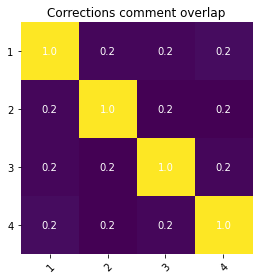

dict_keys([2, 1, 3, 4])


In [66]:
create_heatmap(aug_to_correction_indices)
print(aug_to_correction_indices.keys())

[[1.0, 0.16873949579831932, 0.16005291005291006, 0.16737635113003602], [0.16873949579831932, 1.0, 0.15323906609667873, 0.16475972540045766], [0.16005291005291006, 0.15323906609667873, 1.0, 0.16348332793784395], [0.16737635113003602, 0.16475972540045766, 0.16348332793784395, 1.0]]


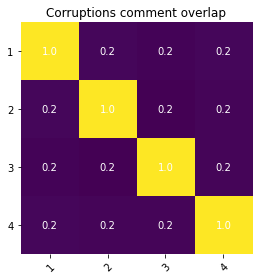

In [67]:
create_heatmap(aug_to_corruption_indices, corrections = False)

In [58]:
aug_to_correction_indices = {}
aug_to_corruption_indices = {}

char_experiments_dir = 'ERM_char_frequency_experiment_2'

experiment_file_paths = []

for subdir in os.listdir(char_experiments_dir):
    subdir_path = char_experiments_dir + "/" + subdir
    
    if os.path.isdir(subdir_path):
        
        for file in os.listdir(subdir_path):
            full_path = subdir_path + "/" + file
            
            if full_path[-5:] == '1.npy':
                
                corrections_corruptions_dict = calculate_corrections_corruptions(full_path, './ERM_predictions/bert.npy')
        
                num_corrections = corrections_corruptions_dict['num_corrections']
                num_corruptions = corrections_corruptions_dict['num_corruptions']

                corrections_indices = corrections_corruptions_dict['corrections_indices']
                corruptions_indices = corrections_corruptions_dict['corruptions_indices']

                assert num_corrections == len(corrections_indices), "number of corrections does not match indices provided"
                assert num_corruptions == len(corruptions_indices), "number of corruptions does not match indices provided"

                print(full_path)
                aug = float(full_path.split('/')[1].split('_')[-1])
                aug_to_correction_indices[aug] = set(corrections_indices)
                aug_to_corruption_indices[aug] = set(corruptions_indices)
                
        
#create_corrections_corruptions_plots(experiment_file_paths)


ERM_char_frequency_experiment_2/word_p_0.20/word_p_0.2nlp_random_word_delete_aug_size_1.npy
ERM_char_frequency_experiment_2/word_p_0.05/word_p_0.05nlp_random_word_delete_aug_size_1.npy
ERM_char_frequency_experiment_2/word_p_0.25/word_p_0.25nlp_random_word_delete_aug_size_1.npy
ERM_char_frequency_experiment_2/word_p_0.10/word_p_0.1nlp_random_word_delete_aug_size_1.npy
ERM_char_frequency_experiment_2/word_p_0.50/word_p_0.5nlp_random_word_delete_aug_size_1.npy
ERM_char_frequency_experiment_2/word_p_0.75/word_p_0.75nlp_random_word_delete_aug_size_1.npy


[[1.0, 0.16292798110979928, 0.14958569559529, 0.14319157237612173, 0.12171344165435746, 0.12197632527020072], [0.16292798110979928, 1.0, 0.21635569670504168, 0.2113997113997114, 0.19282891022021456, 0.18602922962595986], [0.14958569559529, 0.21635569670504168, 1.0, 0.2750316856780735, 0.27104989604989604, 0.27429906542056076], [0.14319157237612173, 0.2113997113997114, 0.2750316856780735, 1.0, 0.3083522583901085, 0.33178869323447635], [0.12171344165435746, 0.19282891022021456, 0.27104989604989604, 0.3083522583901085, 1.0, 0.4918809201623816], [0.12197632527020072, 0.18602922962595986, 0.27429906542056076, 0.33178869323447635, 0.4918809201623816, 1.0]]


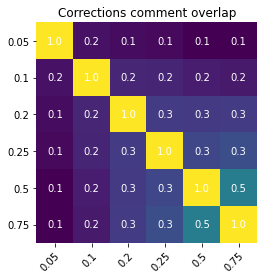

In [59]:
create_heatmap(aug_to_correction_indices)


[[1.0, 0.1516360734237829, 0.11544671689989236, 0.11080835603996367, 0.08353121944405643, 0.07331665397585119], [0.1516360734237829, 1.0, 0.14808531265147842, 0.14107365792759052, 0.11886893594210668, 0.10536884379623758], [0.11544671689989236, 0.14808531265147842, 1.0, 0.19197454481173767, 0.18999256873916273, 0.18507281553398058], [0.11080835603996367, 0.14107365792759052, 0.19197454481173767, 1.0, 0.23156517602283538, 0.2315976682146033], [0.08353121944405643, 0.11886893594210668, 0.18999256873916273, 0.23156517602283538, 1.0, 0.4135546334716459], [0.07331665397585119, 0.10536884379623758, 0.18507281553398058, 0.2315976682146033, 0.4135546334716459, 1.0]]


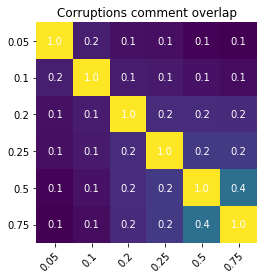

In [60]:
create_heatmap(aug_to_corruption_indices, corrections = False)


#### For del_10_words

In [61]:
aug_to_correction_indices = {}
aug_to_corruption_indices = {}

word_experiments_dir = 'ERM_word_frequency_experiment'


for filename in os.listdir(word_experiments_dir):
    full_path = './' + word_experiments_dir + '/' + filename

    if os.path.isfile(full_path) and full_path[-4:] == '.npy':
        corrections_corruptions_dict = calculate_corrections_corruptions(full_path, './ERM_predictions/bert.npy')
        
        num_corrections = corrections_corruptions_dict['num_corrections']
        num_corruptions = corrections_corruptions_dict['num_corruptions']
        
        corrections_indices = corrections_corruptions_dict['corrections_indices']
        corruptions_indices = corrections_corruptions_dict['corruptions_indices']
        
        assert num_corrections == len(corrections_indices), "number of corrections does not match indices provided"
        assert num_corruptions == len(corruptions_indices), "number of corruptions does not match indices provided"
        
        aug = int(full_path.split('/')[-1].split('.')[0].split('_')[-1])
        aug_to_correction_indices[aug] = set(corrections_indices)
        aug_to_corruption_indices[aug] = set(corruptions_indices)

        
 

[[1.0, 0.18005071851225699, 0.1720183486238532, 0.15478615071283094, 0.15259348612786489, 0.14632735685367265, 0.13319126265316994, 0.13969849246231156, 0.13575525812619502, 0.12934631432545202], [0.18005071851225699, 1.0, 0.22611464968152867, 0.22183304144775248, 0.2328693790149893, 0.23068947641264903, 0.20873320537428022, 0.22807017543859648, 0.21403508771929824, 0.21217316759537078], [0.1720183486238532, 0.22611464968152867, 1.0, 0.250701065619742, 0.2675324675324675, 0.27461928934010155, 0.2557919621749409, 0.26790571169537625, 0.25757575757575757, 0.2542301184433164], [0.15478615071283094, 0.22183304144775248, 0.250701065619742, 1.0, 0.2703360935216756, 0.2708728652751423, 0.28305315765561107, 0.2752688172043011, 0.27775467775467777, 0.27877551020408164], [0.15259348612786489, 0.2328693790149893, 0.2675324675324675, 0.2703360935216756, 1.0, 0.3054676909173068, 0.2894177645558861, 0.3185215946843854, 0.3142514011208967, 0.3114947038054139], [0.14632735685367265, 0.2306894764126490

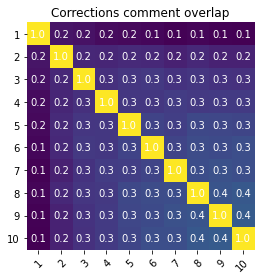

In [62]:
create_heatmap(aug_to_correction_indices)


[[1.0, 0.1730458221024259, 0.1435490973139586, 0.14193056085463562, 0.13443396226415094, 0.13623725671918444, 0.11830985915492957, 0.11488923235445647, 0.10970258410531449, 0.10989776951672862], [0.1730458221024259, 1.0, 0.20918367346938777, 0.2136125654450262, 0.18346650276582668, 0.1976978417266187, 0.1880501467057882, 0.17941176470588235, 0.16980255516840884, 0.1704115684093437], [0.1435490973139586, 0.20918367346938777, 1.0, 0.22810333963453056, 0.2357535435348568, 0.23066595059076261, 0.22734138972809667, 0.21471680594243267, 0.21563822677656494, 0.21592124973250587], [0.14193056085463562, 0.2136125654450262, 0.22810333963453056, 1.0, 0.2646979138444866, 0.26274410347451177, 0.2643319740945071, 0.26041200179131213, 0.26169433067471437, 0.2537128712871287], [0.13443396226415094, 0.18346650276582668, 0.2357535435348568, 0.2646979138444866, 1.0, 0.298011639185257, 0.29561624971310535, 0.2962643057654934, 0.29513311148086524, 0.2966237942122186], [0.13623725671918444, 0.19769784172661

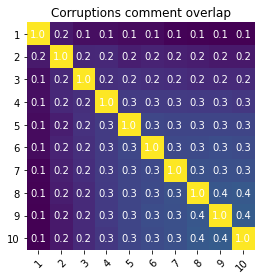

In [63]:
create_heatmap(aug_to_corruption_indices, corrections = False)


## 10-word deletion correction/corruption length analysis:

In [ ]:
del_10_corrections_comment_length = []

for comment in del_10_corrections_inputs[0]:
    comment_length = len(comment.split())
    del_10_corrections_comment_length.append(comment_length)
    

q10, q90 = np.percentile(del_10_corrections_comment_length, [10, 90])
print(q10)
print(q90)
bin_width = 2 * (q90 - q10) * len(del_10_corrections_comment_length) ** (-1/3)
bins = round((max(del_10_corrections_comment_length) - min(del_10_corrections_comment_length)) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(del_10_corrections_comment_length, bins=bins)
plt.ylim(0, 1000)

In [ ]:
del_10_corruptions_comment_length = []

for comment in del_10_corruptions_inputs[0]:
    comment_length = len(comment.split())
    del_10_corruptions_comment_length.append(comment_length)
    

q10, q90 = np.percentile(del_10_corruptions_comment_length, [10, 90])
print(q10)
print(q90)
bin_width = 2 * (q90 - q10) * len(del_10_corruptions_comment_length) ** (-1/3)
bins = round((max(del_10_corruptions_comment_length) - min(del_10_corruptions_comment_length)) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(del_10_corruptions_comment_length, bins=bins)
plt.ylim(0, 1000)

In [ ]:
char_experiments_dir = 'ERM_char_frequency_experiment'

experiment_file_paths = []

for filename in os.listdir(word_experiments_dir):
    full_path = './' + word_experiments_dir + '/' + filename

    if os.path.isfile(full_path):
        experiment_file_paths.append(full_path)
        
create_corrections_corruptions_plots(experiment_file_paths)